# Clustering

In [85]:
# Import KMeans from sklearn.cluster
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme()

# import final data from eda
%store -r data4D

In [86]:
print(data4D)

          PC1       PC2       PC3       PC4
0   -5.083513 -0.489437  0.206438  0.606915
1    1.211577  1.140560  0.264266 -1.982130
2   -0.269750 -0.107938 -1.493389 -2.119109
3    3.260669  1.273273  0.255009  0.112055
4   -5.685200 -1.543241 -2.306631 -0.872329
..        ...       ...       ...       ...
186  0.956726  0.212143 -0.406291 -0.188778
187  0.119844 -0.172125 -0.259828 -1.690555
188 -3.799607 -0.266717 -0.117585  0.121078
189 -4.329338 -0.937306 -2.210441 -1.360704
190 -3.753485 -0.016528  0.881468  1.253542

[191 rows x 4 columns]


# Determining ideal number of clusters
We will be trying two methods to determine the ideal number of clusters:  
1. Elbow method based on WSS  
2. Silhouette method  


### Elbow method
Varry clusters from 1 to 50

<AxesSubplot:xlabel='clusters', ylabel='wss'>

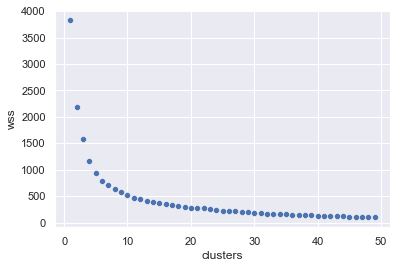

In [87]:
CLUSTERS = range(1,50) # clusters
CENTROID_SEL = "k-means++"

# array to store: (cluster_num, score)
scores = []

# generate WSS score for each cluster_num from 1 to 50
for num in CLUSTERS:
    kmeans = KMeans(n_clusters=num, init=CENTROID_SEL)
    model = kmeans.fit(data4D)
    wss = model.inertia_
    scores.append([num, wss])

# convert array to dataframe
scores = pd.DataFrame(scores, columns=["clusters", "wss"])

# plot the scores on "eblow plot"
sb.scatterplot(x="clusters", y="wss", data=scores)

From elbow method plot, the ideal number of clusters appears to be between 4 to 6

### Silouhette method

Silhouette score can be within a range of -1 to +1. The higher the score the better.  

score measures both cohesion (inter cluster closeness) and seperation (between cluster seperation).   

Each data point (x) has a value for cohesion and seperation. 
cohesion, a = mean of euclidean distance from x to every other point within the cluster  
seperation = mean of euclidean distance from x to every point in another cluster  
b = minimum of all the seperation scores (this gives us the average distance to the nearest cluster)  
silouhette coefficient = (b - a) / max(a,b)  
Since we want b to be as large as possible and a to be as small as possible: the best score is 1 and worst is -1  

Cluster with highest score:
   clusters     score
1         3  0.446588


<AxesSubplot:xlabel='clusters', ylabel='score'>

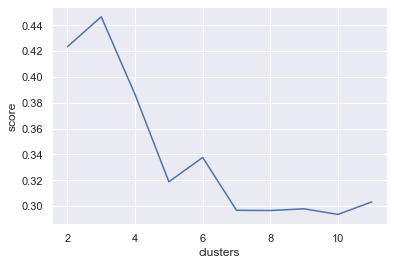

In [88]:
scores = []
CLUSTERS = CLUSTERS = range(2,12) # minimum of 2 clusters in needed to calculate silouhette score
for num in CLUSTERS:
    # labels is an array, where each  data-point is assigned to a cluster
    # example: [0,1,1,2,4,3,...] means that the first point is in cluster 0, 2nd point is in cluster 1 and so on
    labels = KMeans(n_clusters=num, init=CENTROID_SEL, random_state=200).fit(data4D).labels_

    # determine silouhette score
    score = metrics.silhouette_score(data4D, labels, metric="euclidean", sample_size=191, random_state=200)
    scores.append([num, score])

# convert array to dataframe
scores = pd.DataFrame(scores, columns=["clusters", "score"])

# select maximum score
max = scores["score"].max()
print("Cluster with highest score:")
print(scores[scores["score"] == max])

# plot the scores on "eblow plot"
sb.lineplot(x="clusters", y="score", data=scores)


We will use 3 as our number of clusters according to the result from the silhouette score analysis 

# Creating and Evaluating KMeans model

In [89]:
OPTIMAL_CLUSTERS = 3
model = KMeans(n_clusters = OPTIMAL_CLUSTERS, init = CENTROID_SEL, n_init = 20).fit(data4D)


Within Cluster Sum of Squares : 1589.3334561032766

cluster 0, cluster 1, cluster 2
125 64 2


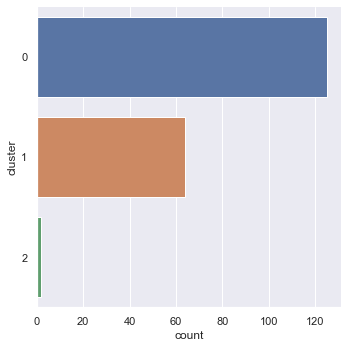

In [93]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", model.inertia_)
print()

# Predict the Cluster Labels
cluster_labels = model.predict(data4D)

# add cluster labels back to data
clustered_data = data4D.copy()
clustered_data["cluster"] = pd.Categorical(cluster_labels)

# Summary of the Clusters
print("cluster 0, cluster 1, cluster 2")
count0 = clustered_data[clustered_data["cluster"] == 0]["cluster"].count()
count1 = clustered_data[clustered_data["cluster"] == 1]["cluster"].count()
count2 = clustered_data[clustered_data["cluster"] == 2]["cluster"].count()
print(count0, count1, count2)

sb.catplot(y = "cluster", data = clustered_data, kind = "count")

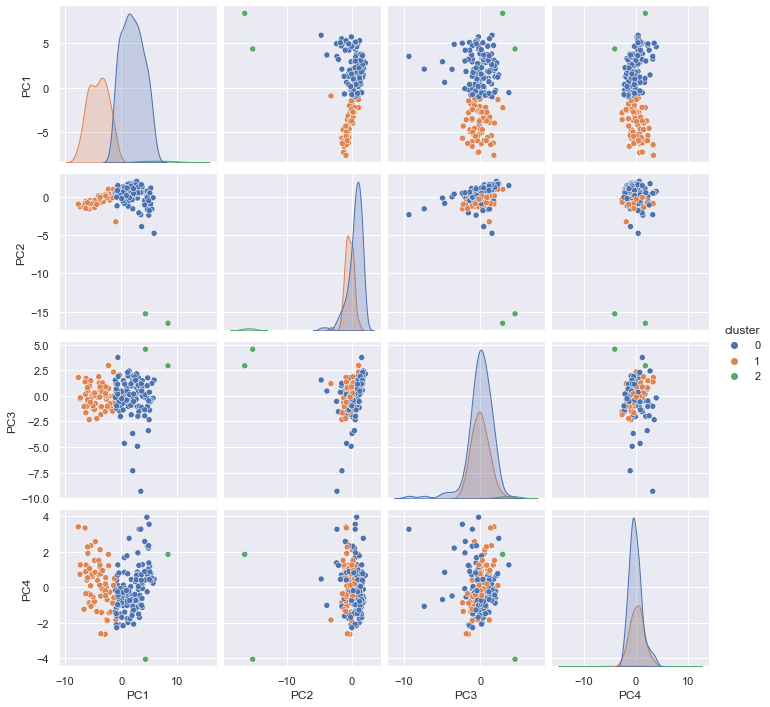

In [91]:
# Plot the Clusters on 2D grids
sb.pairplot(clustered_data, vars = data4D.columns.values, hue = "cluster")